In [103]:
import pandas as pd
import statsmodels.api as sm
#!/usr/bin/env python
"""
Colored by Group Example
========================
Generating a word cloud that assigns colors to words based on
a predefined mapping from colors to words
"""

from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.
       Uses wordcloud.get_single_color_func
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [104]:
df = pd.read_csv("Data/Processed/linear_reg_data.csv")
df = df.dropna().drop(columns=["Unnamed: 0"]).reset_index(drop=True)
df = df[df["Net Income"] > 1000000000]
df


,Change To Liabilities,Total Cash From Operating Activities,Net Borrowings,Total Cashflows From Investing Activities,Investments,Net Income,Total Liab,Total Assets,Retained Earnings,Cash,Net Receivables,Long Term Debt,Short Long Term Debt,Total Current Assets,Returns
0,2.027500e+10,4.696600e+10,-1.000000e+09,-1.610600e+10,-1.292900e+10,3.463000e+10,3.092590e+11,3.811910e+11,1.443500e+10,3.711900e+10,6.525300e+10,1.066290e+11,1.116900e+10,1.531540e+11,0.213565
1,1.405000e+10,2.020000e+10,3.220000e+09,8.350000e+08,4.608000e+09,2.055100e+10,2.879120e+11,3.510020e+11,5.562000e+09,3.494000e+10,5.150600e+10,1.091060e+11,9.613000e+09,1.348360e+11,0.102917
2,3.070000e+08,2.109400e+10,3.220000e+09,3.572000e+09,5.747000e+09,2.174400e+10,2.655600e+11,3.298400e+11,9.233000e+09,3.405000e+10,3.390800e+10,1.057520e+11,8.039000e+09,1.144230e+11,0.096063
3,-2.336600e+10,2.398100e+10,1.042300e+10,-1.036800e+10,-7.895000e+09,2.363000e+10,2.679800e+11,3.371580e+11,1.526100e+10,3.846600e+10,3.303600e+10,1.086420e+11,8.003000e+09,1.214650e+11,-0.094029
12,8.909000e+09,2.208600e+10,-3.100000e+09,-1.258000e+10,4.271000e+09,1.432300e+10,2.823040e+11,4.205490e+11,8.591500e+10,3.622000e+10,3.264900e+10,5.494400e+10,1.687000e+09,1.615800e+11,0.025503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,-1.901744e+09,2.682230e+10,4.167232e+09,-1.333849e+10,1.799423e+09,1.594900e+10,1.832240e+11,4.644270e+11,1.082500e+11,1.326220e+11,3.519000e+10,3.983000e+10,3.733200e+10,2.332740e+11,0.029178
368,3.073530e+08,2.212551e+10,6.475969e+09,-2.322245e+10,-6.018215e+09,1.746024e+10,1.711889e+11,4.287926e+11,1.002505e+11,1.131049e+11,3.437743e+10,5.108895e+10,2.212810e+10,2.116034e+11,0.246093
369,3.097020e+08,2.312352e+10,6.037583e+09,-1.848232e+10,-1.060335e+10,1.194308e+10,1.814853e+11,4.216774e+11,8.236386e+10,1.240005e+11,3.162152e+10,5.096679e+10,1.426338e+10,2.078333e+11,0.065629
370,1.284689e+09,1.828067e+10,2.195216e+09,-7.119745e+09,-1.668570e+08,1.042792e+10,1.445894e+11,3.942622e+11,9.034396e+10,1.072852e+11,3.101319e+10,2.770260e+10,3.212053e+10,1.790831e+11,0.081508


In [105]:
columns = df.columns.values.tolist()
columns.remove("Returns")
X = df[columns]
y = df["Returns"]

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
output = results.params/abs(results.params.iloc[1])
output

const                                        5.825244e+10
Change To Liabilities                        1.000000e+00
Total Cash From Operating Activities         3.473057e-01
Net Borrowings                              -1.577814e-02
Total Cashflows From Investing Activities   -1.270778e+00
Investments                                  1.479920e-02
Net Income                                   8.131597e-01
Total Liab                                  -7.365760e-02
Total Assets                                 4.976205e-02
Retained Earnings                           -2.056288e-01
Cash                                        -7.511013e-02
Net Receivables                              7.291306e-02
Long Term Debt                              -3.087043e-01
Short Long Term Debt                         1.137247e+00
Total Current Assets                         6.000365e-02
dtype: float64

Perhaps this tells us that for large cap tech companies fundemental factors are not such a good indicator of performance, lets see if anything changes if we normalize the values before pluggin them into the regression

In [110]:
df = pd.read_csv("Data/Processed/predict_linear_reg_data.csv")
df = df.dropna().drop(columns=["Unnamed: 0"]).reset_index(drop=True)
df

,Change To Liabilities,Net Borrowings,Investments,Net Income,Total Liab,Total Assets,Retained Earnings,Cash,Net Receivables,Total Current Liabilities,Total Current Assets,Returns
0,2.027500e+10,-1.000000e+09,-1.292900e+10,3.463000e+10,3.092590e+11,3.811910e+11,1.443500e+10,3.711900e+10,6.525300e+10,1.475740e+11,1.531540e+11,-0.027782
1,1.405000e+10,3.220000e+09,4.608000e+09,2.055100e+10,2.879120e+11,3.510020e+11,5.562000e+09,3.494000e+10,5.150600e+10,1.254810e+11,1.348360e+11,-0.017667
2,3.070000e+08,3.220000e+09,5.747000e+09,2.174400e+10,2.655600e+11,3.298400e+11,9.233000e+09,3.405000e+10,3.390800e+10,1.077540e+11,1.144230e+11,0.087700
3,-2.336600e+10,1.042300e+10,-7.895000e+09,2.363000e+10,2.679800e+11,3.371580e+11,1.526100e+10,3.846600e+10,3.303600e+10,1.063850e+11,1.214650e+11,0.093300
4,5.756580e+08,-1.583400e+07,-1.164580e+09,-1.172211e+09,9.179654e+09,1.233908e+10,-7.177918e+09,4.482641e+09,9.593400e+07,6.573192e+09,1.092664e+10,-0.075584
...,...,...,...,...,...,...,...,...,...,...,...,...
701,9.141800e+07,8.567000e+08,-1.031670e+08,-5.296900e+07,3.265000e+09,6.206500e+09,-2.284300e+09,1.364400e+09,2.175000e+08,1.325400e+09,1.859800e+09,-0.003049
702,1.003800e+07,-1.111000e+06,9.364000e+06,-2.288900e+07,2.494960e+08,4.292190e+08,-5.282650e+08,1.165650e+08,7.359000e+07,1.952220e+08,3.053730e+08,0.033318
703,-5.239000e+06,-1.111000e+06,-1.630000e+05,-2.369300e+07,2.362830e+08,4.136250e+08,-5.053760e+08,1.045890e+08,5.878200e+07,1.795360e+08,2.890710e+08,-0.079054
704,-2.451000e+06,-1.111000e+06,-3.995000e+06,-1.766100e+07,2.426200e+08,4.141270e+08,-4.816830e+08,1.011160e+08,6.131200e+07,1.824400e+08,2.866320e+08,-0.110018


In [111]:
columns = df.columns.values.tolist()
columns.remove("Returns")
X = df[columns]
y = df["Returns"]

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
output = results.params/abs(results.params.iloc[1])
output

const                        8.163774e+09
Change To Liabilities       -1.000000e+00
Net Borrowings              -2.681154e-01
Investments                 -1.197345e-01
Net Income                   1.812647e-01
Total Liab                  -3.747576e-02
Total Assets                 6.354751e-03
Retained Earnings           -1.192692e-02
Cash                         2.896582e-02
Net Receivables              1.567684e-02
Total Current Liabilities    1.059928e-01
Total Current Assets        -4.476471e-02
dtype: float64

In [112]:
#lets generate a word cloud of these findings
min_val = min(abs(results.params))
word_cloud_output = results.params/min_val
word_cloud_output

word_could_dict= {}
for i in range(1,len(word_cloud_output)):
    word_could_dict[word_cloud_output.index[i]] = int(abs(word_cloud_output[i]) * 10)
word_could_dict

{'Change To Liabilities': 1573,
 'Net Borrowings': 421,
 'Investments': 188,
 'Net Income': 285,
 'Total Liab': 58,
 'Total Assets': 10,
 'Retained Earnings': 18,
 'Cash': 45,
 'Net Receivables': 24,
 'Total Current Liabilities': 166,
 'Total Current Assets': 70}

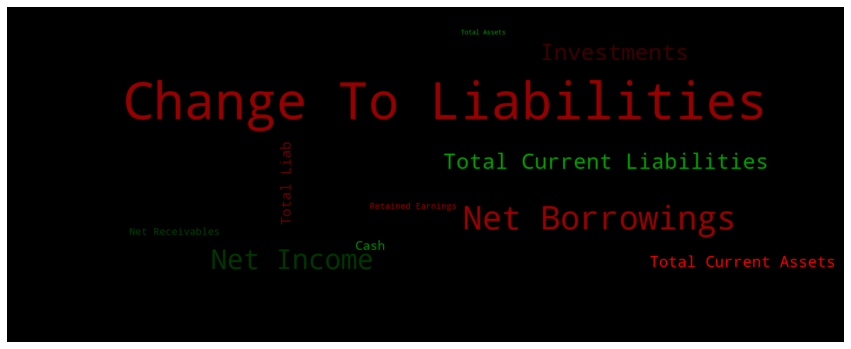

In [116]:
# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(width = 1800, height = 720,collocations=False).generate_from_frequencies(word_could_dict)

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': [word_cloud_output.index[i] for i in range(1,len(word_cloud_output)) if word_cloud_output[i] > 0],
    # will be colored with a red single color function
    'red': [word_cloud_output.index[i] for i in range(1,len(word_cloud_output)) if word_cloud_output[i] < 0]
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("3 month analysis factor_model.png",  dpi=200,bbox_inches='tight', pad_inches=0)
plt.show()